# Introduction

# Import libraries

In [2]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

# Import data

In [3]:
# Load the dataset
file_path = 'data/ChCh-Miner_durgbank-chem-chem.tsv.gz'
df = pd.read_csv(file_path, sep='\t', compression='gzip', header=None, names=['Drug1', 'Drug2'])
df

,Drug1,Drug2
0,DB00862,DB00966
1,DB00575,DB00806
2,DB01242,DB08893
3,DB01151,DB08883
4,DB01235,DB01275
...,...,...
48509,DB00542,DB01354
48510,DB00476,DB01239
48511,DB00621,DB01120
48512,DB00808,DB01356


In [4]:
# Create a graph from the dataframe
G = nx.from_pandas_edgelist(df, 'Drug1', 'Drug2')

# Basic information about the graph
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())
print("Is the graph connected?", nx.is_connected(G))

Number of nodes: 1514
Number of edges: 48514
Is the graph connected? False


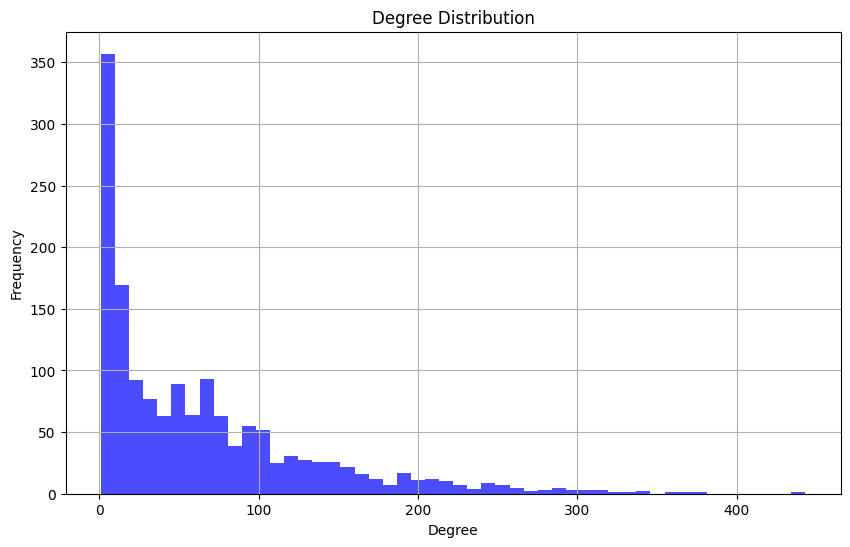

Average degree: 64.08718626155878
Maximum degree: 443
Minimum degree: 1


In [4]:
# Degree distribution
degrees = [G.degree(n) for n in G.nodes()]
degree_counts = nx.degree_histogram(G)

# Plot degree distribution
plt.figure(figsize=(10, 6))
plt.hist(degrees, bins=50, color='blue', alpha=0.7)
plt.title('Degree Distribution')
plt.xlabel('Degree')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Print some statistics
print("Average degree:", sum(degrees) / len(degrees))
print("Maximum degree:", max(degrees))
print("Minimum degree:", min(degrees))


Average clustering coefficient: 0.3039679581007187


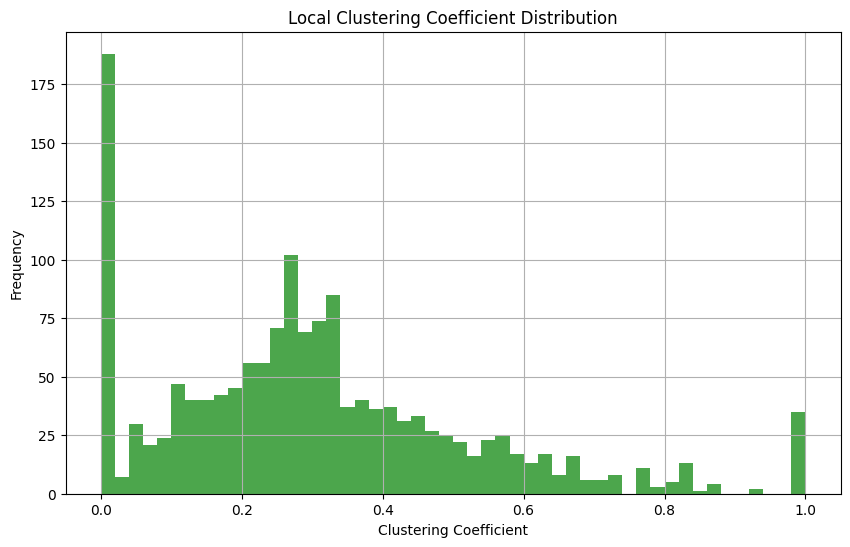

In [5]:
# Average clustering coefficient
avg_clustering = nx.average_clustering(G)
print("Average clustering coefficient:", avg_clustering)

# Local clustering coefficient for each node
local_clustering = nx.clustering(G)

# Plot local clustering coefficient distribution
plt.figure(figsize=(10, 6))
plt.hist(local_clustering.values(), bins=50, color='green', alpha=0.7)
plt.title('Local Clustering Coefficient Distribution')
plt.xlabel('Clustering Coefficient')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

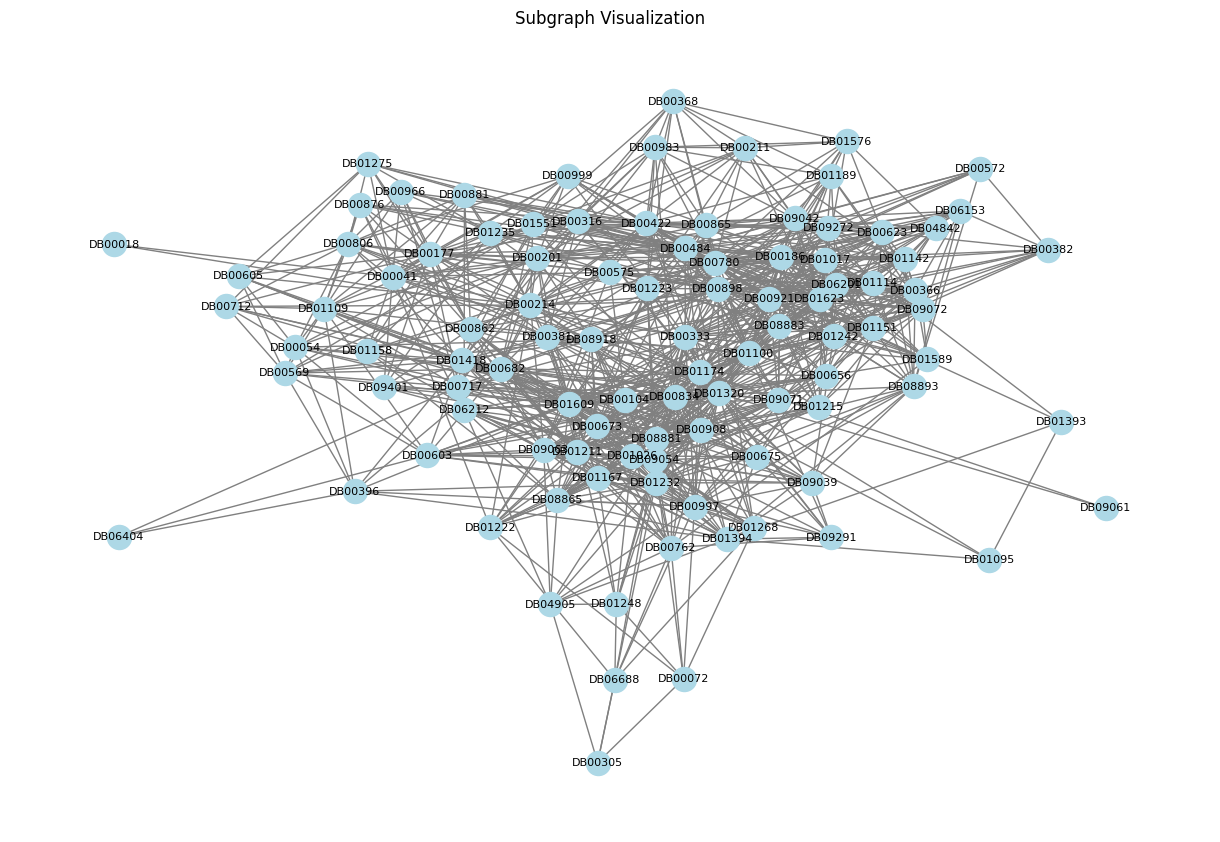

In [6]:
# Create a subgraph with the first 100 nodes for visualization
subgraph_nodes = list(G.nodes())[:100]
subgraph = G.subgraph(subgraph_nodes)

# Draw the subgraph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(subgraph, seed=42)  # Layout for positioning nodes
nx.draw(subgraph, pos, with_labels=True, node_size=300, node_color='lightblue', edge_color='gray', font_size=8)
plt.title('Subgraph Visualization')
plt.show()

# Graph centralities analysis

In [7]:
# Function to print top 10 nodes for a centrality measure
def print_top_10(centrality, name):
    sorted_centrality = sorted(centrality.items(), key=lambda x: x[1], reverse=True)
    print(f"Top 10 nodes for {name}:")
    for node, value in sorted_centrality[:10]:
        print(f"Node: {node}, {name}: {value:.4f}")
    print()

# Function to plot centrality distribution
def plot_centrality_distribution(centrality, name):
    plt.figure(figsize=(10, 6))
    plt.hist(centrality.values(), bins=50, color='blue', alpha=0.7)
    plt.title(f'{name} Distribution')
    plt.xlabel(name)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()

## Degree Centrality

Top 10 nodes for Degree Centrality:
Node: DB00252, Degree Centrality: 0.2928
Node: DB00834, Degree Centrality: 0.2505
Node: DB00715, Degree Centrality: 0.2439
Node: DB00752, Degree Centrality: 0.2373
Node: DB00780, Degree Centrality: 0.2267
Node: DB00682, Degree Centrality: 0.2227
Node: DB01609, Degree Centrality: 0.2181
Node: DB00220, Degree Centrality: 0.2135
Node: DB00470, Degree Centrality: 0.2062
Node: DB00363, Degree Centrality: 0.2062



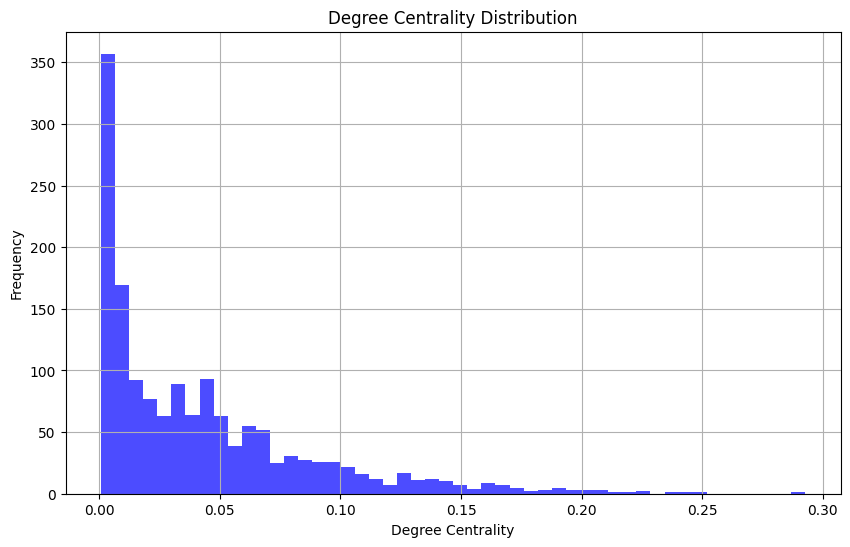

In [8]:
# 1. Degree Centrality
degree_centrality = nx.degree_centrality(G)
print_top_10(degree_centrality, "Degree Centrality")
plot_centrality_distribution(degree_centrality, "Degree Centrality")

## Eigenvector centrality

Top 10 nodes for Eigenvector Centrality:
Node: DB00252, Eigenvector Centrality: 0.1086
Node: DB00834, Eigenvector Centrality: 0.1044
Node: DB00956, Eigenvector Centrality: 0.0919
Node: DB01238, Eigenvector Centrality: 0.0916
Node: DB00715, Eigenvector Centrality: 0.0880
Node: DB00564, Eigenvector Centrality: 0.0878
Node: DB00503, Eigenvector Centrality: 0.0876
Node: DB00220, Eigenvector Centrality: 0.0873
Node: DB08912, Eigenvector Centrality: 0.0826
Node: DB01609, Eigenvector Centrality: 0.0826



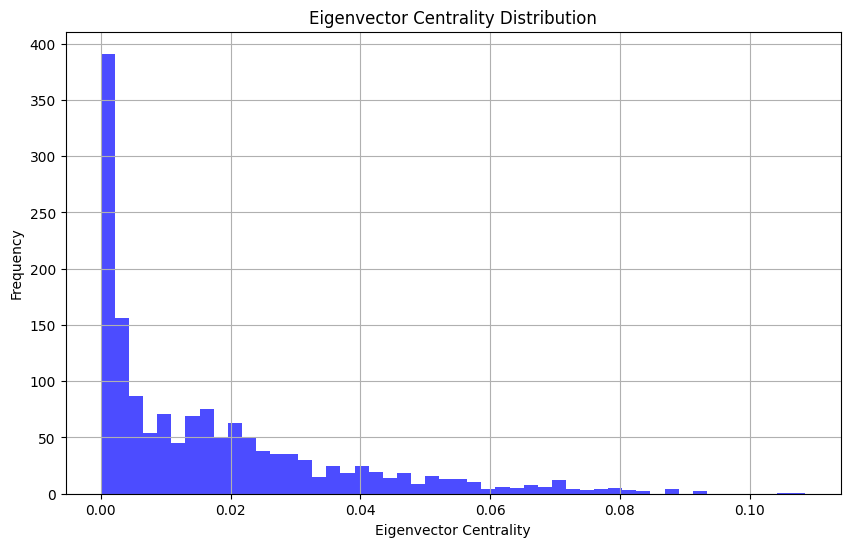

In [14]:
eigenvector_centrality = nx.eigenvector_centrality(G, max_iter=1000)
print_top_10(eigenvector_centrality, "Eigenvector Centrality")
plot_centrality_distribution(eigenvector_centrality, "Eigenvector Centrality")

## Katz Centrality

In [22]:
is_connected = nx.is_connected(G)

Top 10 nodes for Katz Centrality:
Node: DB00834, Katz Centrality: 0.1198
Node: DB00252, Katz Centrality: 0.1174
Node: DB00956, Katz Centrality: 0.1072
Node: DB01238, Katz Centrality: 0.1047
Node: DB00220, Katz Centrality: 0.1025
Node: DB00503, Katz Centrality: 0.1015
Node: DB00564, Katz Centrality: 0.1011
Node: DB09118, Katz Centrality: 0.0994
Node: DB08912, Katz Centrality: 0.0971
Node: DB09054, Katz Centrality: 0.0960



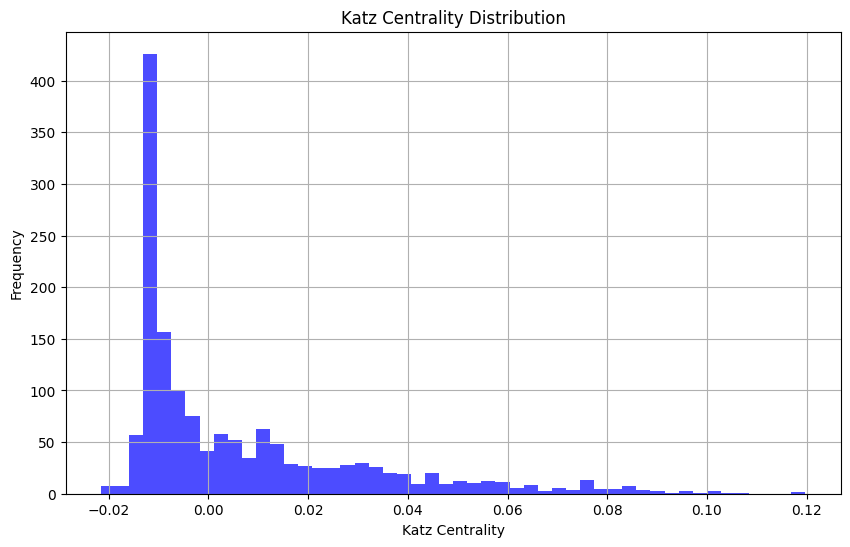

In [26]:
katz_centrality = nx.katz_centrality_numpy(G, alpha=0.01, beta=1.0)
print_top_10(katz_centrality, "Katz Centrality")
plot_centrality_distribution(katz_centrality, "Katz Centrality")

## PageRank Centrality

Top 10 nodes for PageRank Centrality:
Node: DB00682, PageRank Centrality: 0.0045
Node: DB00252, PageRank Centrality: 0.0041
Node: DB01418, PageRank Centrality: 0.0039
Node: DB00834, PageRank Centrality: 0.0033
Node: DB01609, PageRank Centrality: 0.0032
Node: DB00363, PageRank Centrality: 0.0032
Node: DB00715, PageRank Centrality: 0.0031
Node: DB00752, PageRank Centrality: 0.0031
Node: DB00864, PageRank Centrality: 0.0030
Node: DB00266, PageRank Centrality: 0.0029



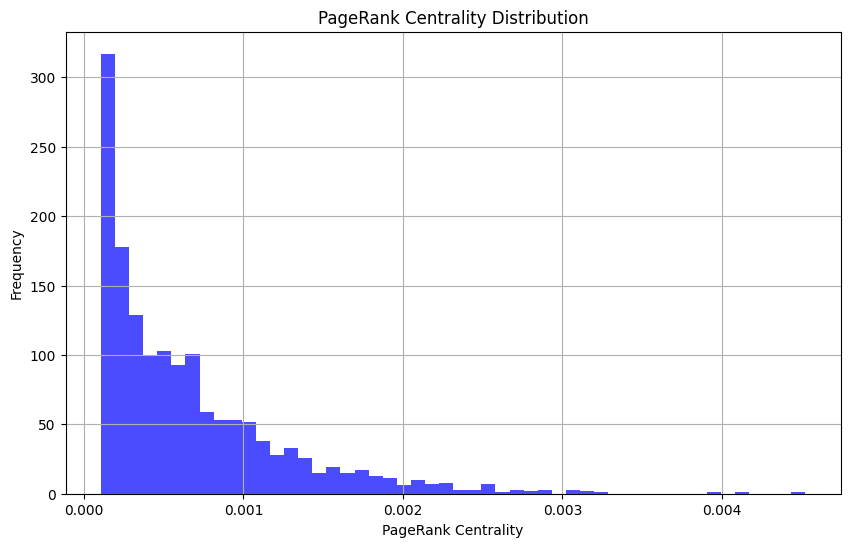

In [17]:
pagerank_centrality = nx.pagerank(G, alpha=0.85)
print_top_10(pagerank_centrality, "PageRank Centrality")
plot_centrality_distribution(pagerank_centrality, "PageRank Centrality")

## Clustering Coefficient Centrality

Top 10 nodes for Clustering Coefficient:
Node: DB01438, Clustering Coefficient: 1.0000
Node: DB01159, Clustering Coefficient: 1.0000
Node: DB00583, Clustering Coefficient: 1.0000
Node: DB00743, Clustering Coefficient: 1.0000
Node: DB04711, Clustering Coefficient: 1.0000
Node: DB00210, Clustering Coefficient: 1.0000
Node: DB09135, Clustering Coefficient: 1.0000
Node: DB06659, Clustering Coefficient: 1.0000
Node: DB01086, Clustering Coefficient: 1.0000
Node: DB01127, Clustering Coefficient: 1.0000



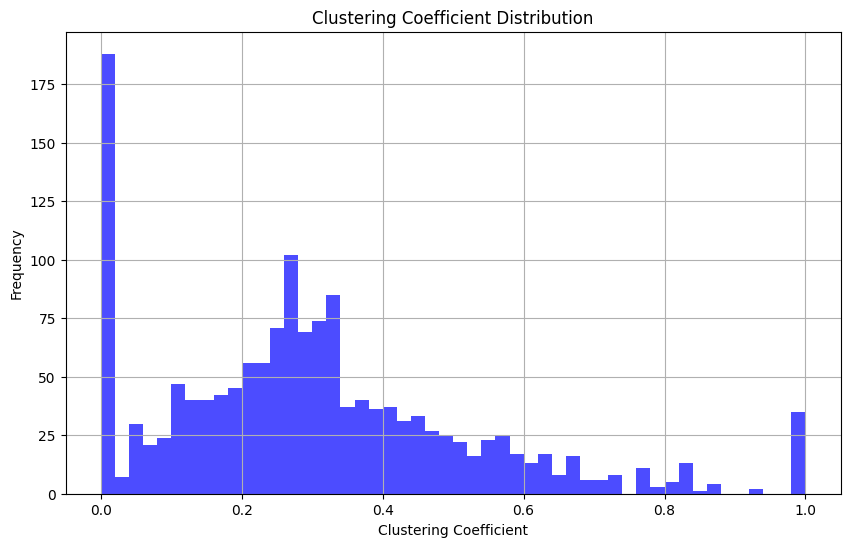

In [18]:
clustering_coefficient = nx.clustering(G)
print_top_10(clustering_coefficient, "Clustering Coefficient")
plot_centrality_distribution(clustering_coefficient, "Clustering Coefficient")

## Closeness Centrality

Top 10 nodes for Closeness Centrality:
Node: DB00252, Closeness Centrality: 0.5545
Node: DB00834, Closeness Centrality: 0.5402
Node: DB01609, Closeness Centrality: 0.5260
Node: DB00794, Closeness Centrality: 0.5249
Node: DB00220, Closeness Centrality: 0.5237
Node: DB00715, Closeness Centrality: 0.5228
Node: DB00682, Closeness Centrality: 0.5222
Node: DB01320, Closeness Centrality: 0.5209
Node: DB00503, Closeness Centrality: 0.5200
Node: DB00564, Closeness Centrality: 0.5193



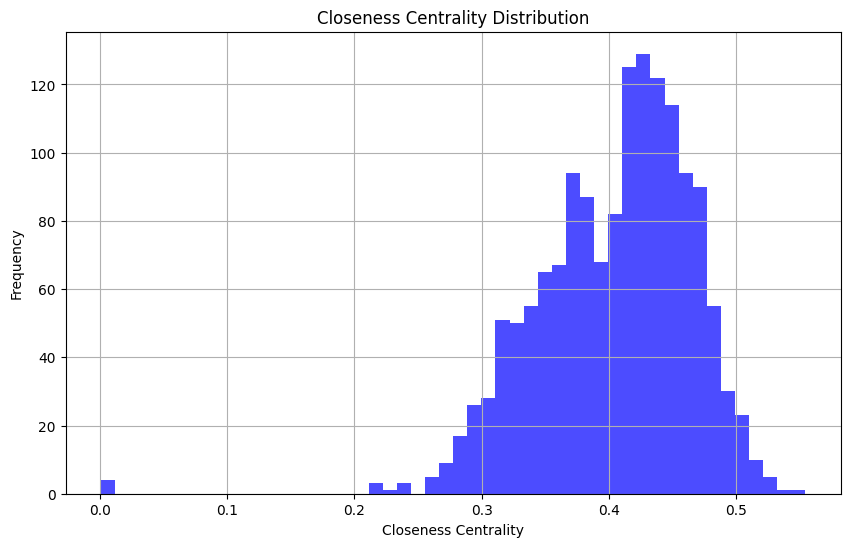

In [19]:
closeness_centrality = nx.closeness_centrality(G)
print_top_10(closeness_centrality, "Closeness Centrality")
plot_centrality_distribution(closeness_centrality, "Closeness Centrality")


## Betweenness Centrality

Top 10 nodes for Betweenness Centrality:
Node: DB00682, Betweenness Centrality: 0.0420
Node: DB01418, Betweenness Centrality: 0.0290
Node: DB00252, Betweenness Centrality: 0.0284
Node: DB00363, Betweenness Centrality: 0.0276
Node: DB00864, Betweenness Centrality: 0.0206
Node: DB01609, Betweenness Centrality: 0.0199
Node: DB00266, Betweenness Centrality: 0.0186
Node: DB00091, Betweenness Centrality: 0.0178
Node: DB00715, Betweenness Centrality: 0.0168
Node: DB09268, Betweenness Centrality: 0.0165



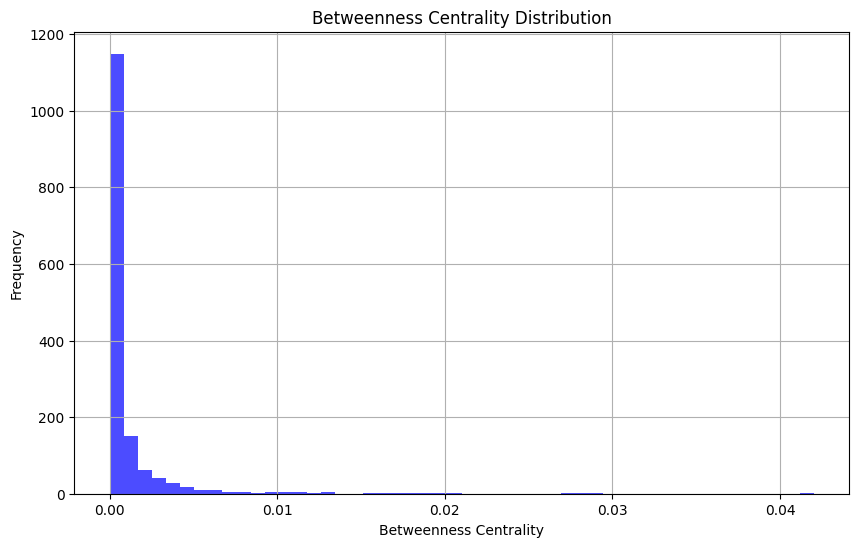

In [20]:
betweenness_centrality = nx.betweenness_centrality(G)
print_top_10(betweenness_centrality, "Betweenness Centrality")
plot_centrality_distribution(betweenness_centrality, "Betweenness Centrality")

## Conclusions

In [29]:
# Borda Count to determine the most central node
def borda_count(centralities):
    borda_scores = {}
    for centrality in centralities:
        sorted_nodes = sorted(centrality.keys(), key=lambda x: centrality[x], reverse=True)
        for rank, node in enumerate(sorted_nodes):
            if node not in borda_scores:
                borda_scores[node] = 0
            borda_scores[node] += len(sorted_nodes) - rank
    return borda_scores

# List of all centrality measures
centralities = [
    degree_centrality,
    eigenvector_centrality,
    katz_centrality,
    pagerank_centrality,
    # clustering_coefficient,
    closeness_centrality,
    betweenness_centrality
]

# Compute Borda count
borda_scores = borda_count(centralities)
sorted_borda = sorted(borda_scores.items(), key=lambda x: x[1], reverse=True)

# Print top 10 nodes based on Borda count
print("Top 10 nodes based on Borda count:")
for node, score in sorted_borda[:10]:
    print(f"Node: {node}, Borda Score: {score}")


Top 10 nodes based on Borda count:
Node: DB00252, Borda Score: 9080
Node: DB00834, Borda Score: 9068
Node: DB01609, Borda Score: 9038
Node: DB00715, Borda Score: 9022
Node: DB00220, Borda Score: 9004
Node: DB00503, Borda Score: 9001
Node: DB01320, Borda Score: 9000
Node: DB01238, Borda Score: 8999
Node: DB00564, Borda Score: 8991
Node: DB00956, Borda Score: 8986


# Community detection Analysis

In [40]:
import numpy as np
import community as community_louvain  # Louvain algorithm
from networkx.algorithms.community import greedy_modularity_communities, girvan_newman
from networkx.algorithms.community import asyn_lpa_communities
import itertools
from collections import defaultdict
import seaborn as sns
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize
from scipy.spatial.distance import euclidean
from scipy.cluster.hierarchy import linkage, fcluster


In [32]:
# Function to print community statistics
def print_community_stats(communities):
    print(f"Number of communities: {len(communities)}")
    sizes = [len(comm) for comm in communities]
    print(f"Community sizes: {sizes}")
    print(f"Largest community: {max(sizes)}")
    print(f"Smallest community: {min(sizes)}")
    print(f"Average community size: {np.mean(sizes):.2f}")
    print()

# Function to plot communities
def plot_aggregated_communities(G, communities, title):
    # Create a new graph where each node represents a community
    community_graph = nx.Graph()
    for i, comm in enumerate(communities):
        community_graph.add_node(i, size=len(comm))  # Store community size as a node attribute
        for node in comm:
            for neighbor in G.neighbors(node):
                for j, other_comm in enumerate(communities):
                    if neighbor in other_comm and i != j:
                        if community_graph.has_edge(i, j):
                            community_graph[i][j]['weight'] += 1
                        else:
                            community_graph.add_edge(i, j, weight=1)

    # Plot the aggregated community graph
    fig, ax = plt.subplots(figsize=(12, 8))
    pos = nx.spring_layout(community_graph, seed=42, k=10.0)

    # Extract edge weights for color mapping
    edge_weights = [community_graph[i][j]['weight'] for i, j in community_graph.edges()]
    edge_colors = edge_weights  # Use edge weights directly for color mapping

    # Normalize edge weights for the color map
    norm = Normalize(vmin=min(edge_weights), vmax=max(edge_weights))
    cmap = plt.get_cmap('viridis')  # Choose a colormap

    # Draw nodes with fixed size and labels for community sizes
    nx.draw_networkx_nodes(community_graph, pos, node_size=300, node_color='lightblue', alpha=0.8, ax=ax)
    for node, (x, y) in pos.items():
        ax.text(x, y + 0.05, s=f"{community_graph.nodes[node]['size']}", 
                fontsize=10, ha='center', va='center', color='black')

    # Draw edges with color based on weight
    edges = nx.draw_networkx_edges(community_graph, pos, edge_color=edge_colors, 
                                   width=2, alpha=0.6, edge_cmap=cmap, edge_vmin=min(edge_weights), 
                                   edge_vmax=max(edge_weights), ax=ax)

    # Add a color bar for edge weights
    sm = ScalarMappable(norm=norm, cmap=cmap)
    sm.set_array([])
    plt.colorbar(sm, ax=ax, label='Edge Weight (Number of Connections)', shrink=0.8)

    # Add labels for nodes (optional, can be disabled if too cluttered)
    nx.draw_networkx_labels(community_graph, pos, font_size=8, font_color='black', ax=ax)

    plt.title(title)
    plt.show()


In [39]:
# 1. Clique-based approach (k-clique communities)
def clique_based_communities(G, k=10):
    communities = list(nx.algorithms.community.k_clique_communities(G, k))
    return [list(comm) for comm in communities]
print("Clique-based Communities (k=4):")
clique_communities = clique_based_communities(G, k=10)
print_community_stats(clique_communities)
plot_aggregated_communities(G, clique_communities, "Clique-based Communities (k=4)")


Clique-based Communities (k=4):


KeyboardInterrupt: 

Louvain Communities:
Number of communities: 9
Community sizes: [163, 311, 353, 100, 404, 175, 4, 2, 2]
Largest community: 404
Smallest community: 2
Average community size: 168.22



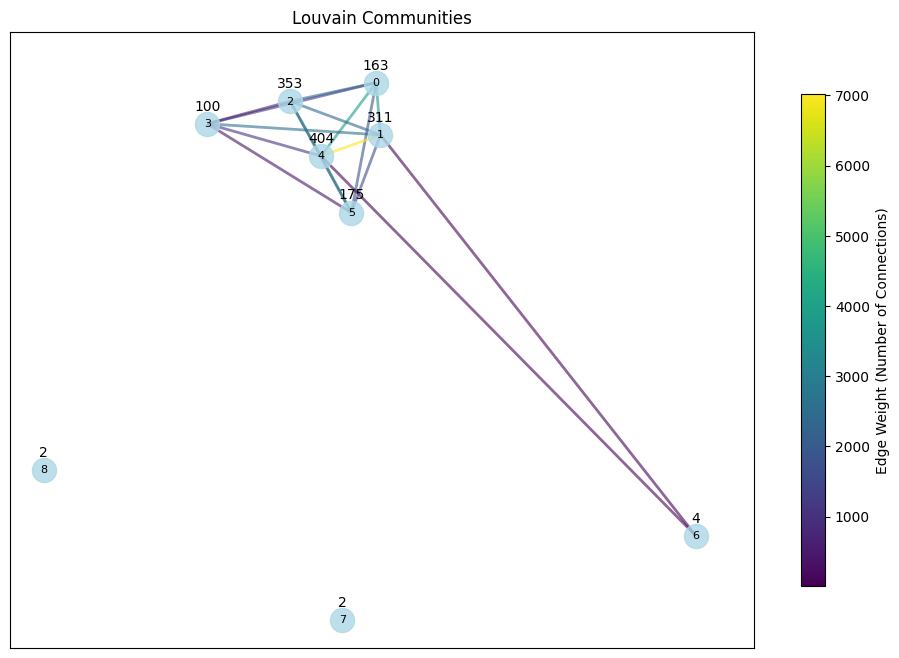

In [33]:
# 2. Modularity maximization (Louvain Algorithm)
def louvain_communities(G):
    partition = community_louvain.best_partition(G)
    communities = defaultdict(list)
    for node, comm_id in partition.items():
        communities[comm_id].append(node)
    return list(communities.values())

print("Louvain Communities:")
louvain_communities = louvain_communities(G)
print_community_stats(louvain_communities)
plot_aggregated_communities(G, louvain_communities, "Louvain Communities")


Walktrap Communities:
Number of communities: 10
Community sizes: [427, 561, 231, 83, 90, 118, 1, 1, 1, 1]
Largest community: 561
Smallest community: 1
Average community size: 151.40



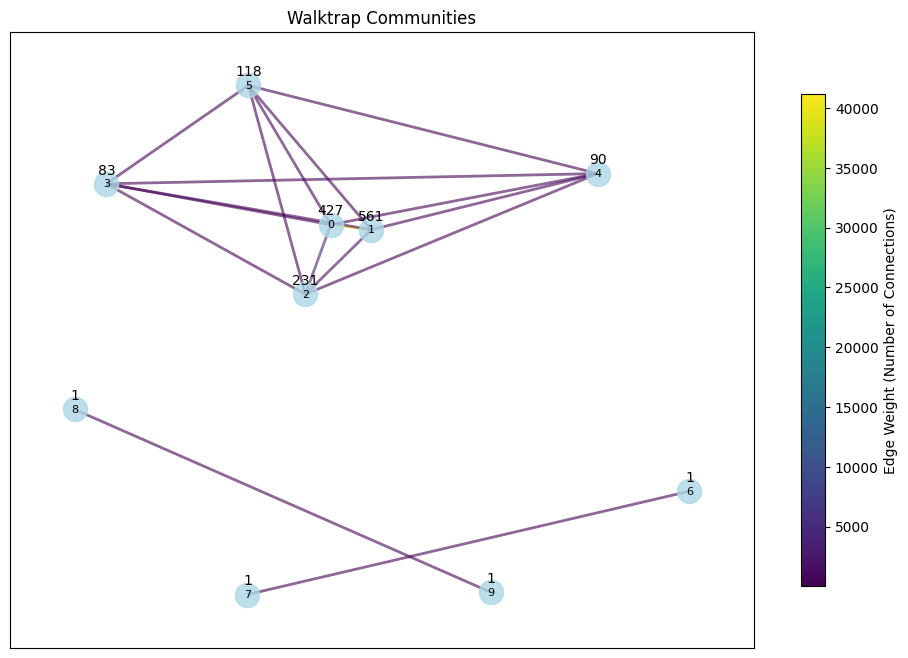

In [43]:
# 3. Random walk-based approach (Walktrap)
def walktrap_communities(G, t=50, num_clusters=None):
    # Step 1: Compute transition probability matrix
    A = nx.to_numpy_array(G)  # Adjacency matrix
    d = A.sum(axis=1)  # Degree vector
    P = (A.T / d).T  # Transition probability matrix
    
    # Step 2: Compute P^t (t-step transition probability matrix)
    Pt = np.linalg.matrix_power(P, t)
    
    # Step 3: Compute the distance metric
    D_inv_sqrt = np.diag(1 / np.sqrt(d))
    Pt_transformed = D_inv_sqrt @ Pt  # Normalize
    distances = np.array([
        euclidean(Pt_transformed[i], Pt_transformed[j])
        for i in range(len(G)) for j in range(i + 1, len(G))
    ])
    
    # Step 4: Hierarchical clustering
    linkage_matrix = linkage(distances, method='ward')
    if num_clusters is None:
        num_clusters = nx.number_connected_components(G)
    clusters = fcluster(linkage_matrix, num_clusters, criterion='maxclust')
    
    # Step 5: Assign nodes to communities
    community_dict = {}
    for node, cluster in zip(G.nodes(), clusters):
        if cluster not in community_dict:
            community_dict[cluster] = []
        community_dict[cluster].append(node)
    
    return list(community_dict.values())

print("Walktrap Communities:")
walktrap_communities = walktrap_communities(G, num_clusters=10)
print_community_stats(walktrap_communities)
plot_aggregated_communities(G, walktrap_communities, "Walktrap Communities")


In [45]:
from itertools import takewhile

In [ ]:
# 4. Edge betweenness separation-based approach (Girvan-Newman)
def girvan_newman_communities(G, k=10):
    comp = nx.algorithms.community.girvan_newman(G)
    limited = takewhile(lambda c: len(c) <= k, comp)
    communities = list(limited)
    # Select the first level of communities
    return [list(comm) for comm in next(communities)]

print("Girvan-Newman Communities:")
girvan_newman_communities = girvan_newman_communities(G)
print_community_stats(girvan_newman_communities)

Girvan-Newman Communities:


In [ ]:
# Compare communities using modularity
def compare_modularity(G, communities):
    modularity = nx.algorithms.community.modularity(G, communities)
    print(f"Modularity: {modularity:.4f}")

print("Modularity Comparison:")
print("Clique-based Communities:")
compare_modularity(G, clique_communities)
print("Louvain Communities:")
compare_modularity(G, louvain_communities)
print("Walktrap Communities:")
compare_modularity(G, walktrap_communities)
print("Girvan-Newman Communities:")
compare_modularity(G, girvan_newman_communities)
